<a href="https://colab.research.google.com/github/MATNAT93/Music-Genre-Recognition/blob/main/Code_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine learning pour la classification de genres musicaux 🎵**
L'objectif de notre projet est de prédire le genre d'un morceau de musique à partir de son signal.

Les features choisies pour la classification relèvent d'observations physiques sur le signal de plusieurs fichiers audio. Pour récolter ces données, nous avons utilisé la librairie Librosa sur 990 morceaux divisés en parts égales selon 10 genres. Ces fichiers sont disponibles non pas sur le dépôt (trop volumineux) mais via le lien suivant https://drive.google.com/drive/folders/12YY4if6Xcg8-s1WlsqS0dXdSRWvysw_D?usp=sharing. La base de données finale est également disponible sur le dépôt sous le nom "données".

Nous avons par la suite implémenté et comparé trois modèles de classification (KNN, SVM, Random Forest).

Enfin, à la fin du code, nous avons construit une fonction permettant à l'utilisateur de renseigner n'importe quel fichier audio au format WAV en entrée et d'en sortir le genre musical.

⚠ Il vous faudra préalablement uploader les fichiers audio (le dossier "data_python") dans votre Google Drive. Si vous sauter l'étape de constitution du dataset, mettez directement le fichier données.csv dans un dossier "data_python".

# **Imports**

In [ ]:
import librosa # Permet de lire et d'analyser les fichiers wav
import librosa.feature

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize

import os # C'est ce qui va nous permettre d'itérer sur les fichiers de l'environnement de travail

from google.colab import drive
drive.mount('/content/drive') # Pour pouvoir importer des fichiers du drive

Mounted at /content/drive


# **Création du dataframe**
Afin de créer notre dataframe, on extrait certaines caractéristiques des audios:
- le zero crossing rate qui correspond au taux de changement de signe d'un signal. Son utilisation est très fréquente en reconnaissance de la parole et en Recherche d'information musicale.

- Le spectral centroid qui est une mesure utilisée en traitement numérique du signal pour caractériser le un spectre. Il correspond à la moyenne pondérée des fréquences présentes dans le signal. Il indique la localisation du centre d’inertie du spectre. En termes simples mais moins scientifiques , il représente la « clarté d’un son » et semble donc un être indicateur pertinent pour classer des morceaux selon leurs genres musicaux.

- Le spectral rolloff point qui est la fréquence de coupure en dessous de laquelle 95% de la puissance de la densité spectrale de puissance (DSP) est concentrée. Il est plus élevé pour son riche en hautes fréquences que pour un son dont l'énergie est concentrée dans des fréquences plus faibles. 

- Les mel-frequency cepstral coefficients (MFCC) qui sont des coefficients constituant le Mel-frequency cepstrum qui est une représentation de la DSP à court terme d'un son obtenue par une transformée de Fourier d'un spectre de puissance d'un signal dont les fréquences sont espacées logarithmiquement selon l'échelle de Mel.
Les MFCC sont très utilisés en traitement du son.

Ces caractéristiques nous serviront à prédire le genre musical d'un morceau.




In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock'] # Liste des genres musicaux qui vont être présents dans le dataset

In [ ]:
audio_files = {} # Intialisation du dictionnaire contenant les infos des wav

for g in genres:
  audio_files[g] = []

for g in genres:
  for audio in os.listdir(f'/content/drive/My Drive/data_python/genres_original/{g}'): 
    audio_files[g].append(librosa.load(f'/content/drive/My Drive/data_python/genres_original/{g}/{audio}')[0]) # On ne garde que la série temporelle. (librosa.load renvoie un array de dimension 2 donnant une série temporelle propre à l'audio (1er élément) et le sampling rate de la série (22050 par défaut))


In [ ]:
def signal_analysis(audio):


  characteristics = []

  # Calcul du ZCR

  zcr = librosa.zero_crossings(audio)
  characteristics.append(sum(zcr))

  # Calcul de la moyenne du centro

  spectral_centroids = librosa.feature.spectral_centroid(audio)[0]
  characteristics.append(np.mean(spectral_centroids))
  
  # Calcul du spectral rolloff point

  rolloff = librosa.feature.spectral_rolloff(audio)
  characteristics.append(np.mean(rolloff))

  # Calcul des moyennes des MFCC

  mfcc = librosa.feature.mfcc(audio)

  for x in mfcc:
    characteristics.append(np.mean(x))


  return characteristics

In [ ]:
# Définissons les noms des colonnes

column_names = ['genre','zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

In [ ]:
# Création d'un dataframe vide

df = pd.DataFrame(columns = column_names)

# On itère sur les audios pour remplir le dataframe

i = 0
for g in genres:
  for music in audio_files[g]:
    df.loc[i] = [g] + signal_analysis(music)
    i+=1

df.to_csv('/content/drive/My Drive/data_python/données.csv', index = False)

## **Analyse des données**

Dans cette partie on réalise une première étude statistique descriptive de notre dataset afin de le nettoyer (si nécessaire) et de tirer quelques informations sur la pertinence des variables et sur les genres qui seront les plus faciles ou plus difficiles à identifier.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data_python/données.csv')

print(df.isnull().sum()/len(df)*100) # On cherche le pourcentage de valeurs manquantes pour chaque variable


genre         0.0
zcr           0.0
spectral_c    0.0
rolloff       0.0
mfcc1         0.0
mfcc2         0.0
mfcc3         0.0
mfcc4         0.0
mfcc5         0.0
mfcc6         0.0
mfcc7         0.0
mfcc8         0.0
mfcc9         0.0
mfcc10        0.0
mfcc11        0.0
mfcc12        0.0
mfcc13        0.0
mfcc14        0.0
mfcc15        0.0
mfcc16        0.0
mfcc17        0.0
mfcc18        0.0
mfcc19        0.0
mfcc20        0.0
dtype: float64


Il ne manque pas de valeurs dans notre dataset. Nous n'avons donc pas besoin de le nettoyer en abandonnant les valeurs manquantes où en les remplaçant par une valeur arbitraire.

Text(0.5, 1.0, 'Moyenne du ZCR par genre')

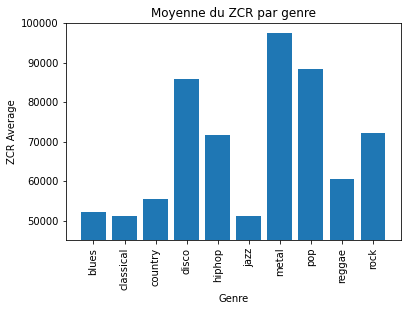

In [ ]:
plt.bar(genres, df.groupby(['genre']).mean().zcr, orientation = 'vertical')
plt.xticks(genres, rotation='vertical')
plt.ylim(45000, 100000)
plt.ylabel('ZCR Average'); plt.xlabel('Genre'); plt.title('Moyenne du ZCR par genre')

Text(0.5, 1.0, 'Moyenne du Centroïde Spectral par genre')

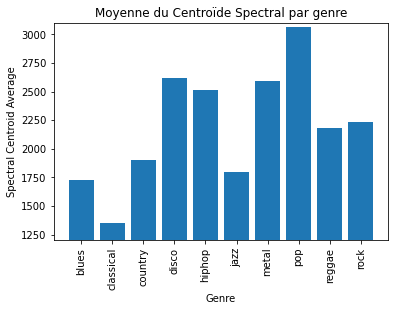

In [ ]:
plt.bar(genres, df.groupby(['genre']).mean().spectral_c, orientation = 'vertical')
plt.xticks(genres, rotation='vertical')
plt.ylim(1200, 3100)
plt.ylabel('Spectral Centroid Average'); plt.xlabel('Genre'); plt.title('Moyenne du Centroïde Spectral par genre')

Text(0.5, 1.0, 'Moyenne du rolloff par genre')

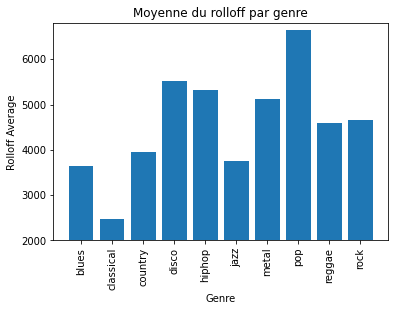

In [ ]:
plt.bar(genres, df.groupby(['genre']).mean().rolloff, orientation = 'vertical')
plt.xticks(genres, rotation='vertical')
plt.ylim(2000, 6800)
plt.ylabel('Rolloff Average'); plt.xlabel('Genre'); plt.title('Moyenne du rolloff par genre')

Pour les autres features, c'est-à-dire les MFCC, nous regardons lesquelles ont les plus grandes volatilités, afin de concentrer l'analyse graphique sur quelques unes d'entre elles.

Text(0.5, 1.0, 'Mesure de volatilité des variables')

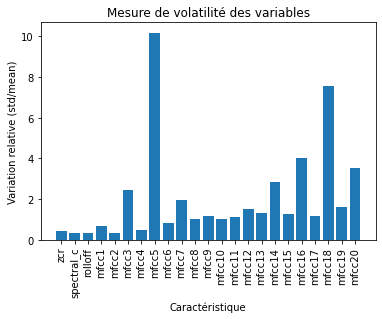

In [ ]:
plt.bar(column_names[1:], df.std()/(df.mean().abs()), orientation = 'vertical')
plt.xticks(column_names[1:], rotation='vertical')
plt.ylabel('Variation relative (std/mean)'); plt.xlabel('Caractéristique'); plt.title('Mesure de volatilité des variables')

Text(0.5, 1.0, 'Moyenne du MFCC5 par genre')

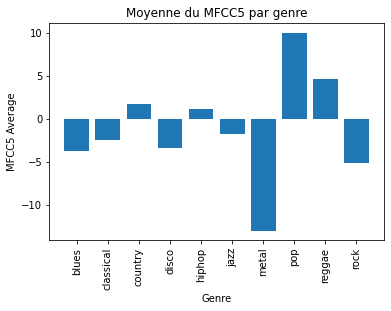

In [ ]:
plt.bar(genres, df.groupby(['genre']).mean().mfcc5, orientation = 'vertical')
plt.xticks(genres, rotation='vertical')
#plt.ylim(2000, 6800)
plt.ylabel('MFCC5 Average'); plt.xlabel('Genre'); plt.title('Moyenne du MFCC5 par genre')

Text(0.5, 1.0, 'Moyenne du MFCC18 par genre')

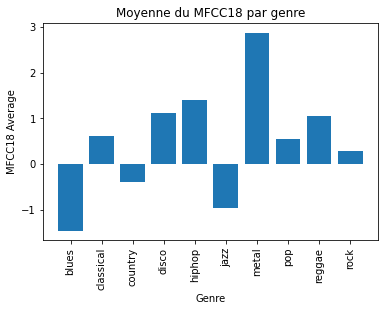

In [ ]:
plt.bar(genres, df.groupby(['genre']).mean().mfcc18, orientation = 'vertical')
plt.xticks(genres, rotation='vertical')
#plt.ylim(2000, 6800)
plt.ylabel('MFCC18 Average'); plt.xlabel('Genre'); plt.title('Moyenne du MFCC18 par genre')

En croisant les données de chaque graphique, on confirme que chaque genre a bien des caractéristiques propres même si en se limitant à une seule caractéristique certains genres peuvent avoir des valeurs proches de d’autres (comme le blues, le jazz et le classique dans le cas du ZCR). Certains genres sont cependant plus faciles à identifier que d’autres. Le métal, la pop et le classique sont les genres qui se différencient le plus et ce sur plusieurs features (ZCR, MFCC5 et MFCC18 pour le métal ; centroïde spectral, rolloff et MFCC5 pour la pop et enfin centroïde spectral et rolloff pour le classique). Le classique s’illustre aussi par le fait que les valeurs de ses caractéristiques sont régulièrement les plus faibles en valeur absolue.

Intéressons-nous maintenant à la corrélation entre les features via la matrice de corrélation. Celle-ci nous indiquera si des variables sont "redondantes".

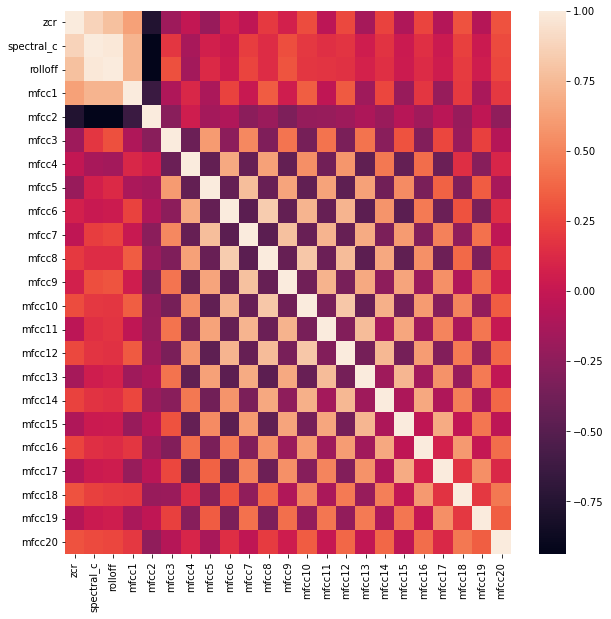

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

On remarque que certaines variables sont corrélées, notamment le rolloff et le centroïde spectral. D'ailleurs, comme vu précédemment, le graphique représentant leur moyenne par genre est très similaire.
Néanmoins, nous préférons garder toutes les variables car les modèles qui nous allons introduire tolèrent bien les variables corrélées.

# **Modèle des K plus proches voisins**

L’algorithme des K plus proches voisins est un algorithme d’apprentissage supervisé permettant de résoudre des problèmes de classification.
Il sélectionne un nombre K de voisins, calcule la distance du point que l’on cherche à classifier aux autres points, prend les K voisins les plus proches et compte le nombre de points appartenant à chaque catégorie. Le point que l’on cherchait à classifier est alors attribué à la catégorie la plus présente parmi les K voisins définis plus tôt.


In [ ]:
# On split le dataset pour pouvoir entrainer le modèle par la suite
X_train, X_test, y_train, y_test = train_test_split(df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                                                        'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                                                        'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 
                                                        'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']],df['genre'], test_size=0.2, random_state=0)

              precision    recall  f1-score   support

       blues       0.19      0.50      0.28        14
   classical       0.55      0.50      0.52        12
     country       0.23      0.22      0.22        23
       disco       0.26      0.32      0.29        22
      hiphop       0.12      0.09      0.10        23
        jazz       0.24      0.50      0.32        12
       metal       0.40      0.38      0.39        21
         pop       0.58      0.30      0.40        23
      reggae       0.00      0.00      0.00        21
        rock       0.29      0.15      0.20        27

    accuracy                           0.26       198
   macro avg       0.29      0.30      0.27       198
weighted avg       0.28      0.26      0.25       198



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


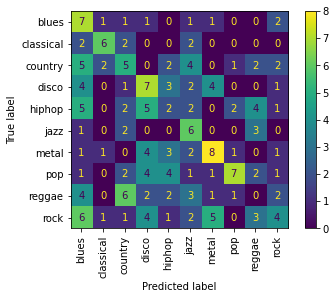

In [ ]:

#Fit du training set
knn = KNeighborsClassifier(n_neighbors=5) # 5 "points" les plus proches 
knn.fit(X_train, y_train)

# Prediction sur le Test set
y_pred = knn.predict(X_test)

#Vérification de la qualité du modèle
print(classification_report(y_test, y_pred))

sklearn.metrics.plot_confusion_matrix(knn, X_test, y_test, xticks_rotation='vertical') # Matrice de confusion


Avant d'interpréter les résutats, rappelons les définitions de la précision, du rappel (ici recall) et de la mesure F1 (f1-score). 
La précision est la proportion des items pertinents parmi l'ensemble des items proposés. Le rappel quant-à lui est la proportion des items pertinents proposés parmi l'ensemble des items pertinents. Ces deux notions correspondent ainsi à une conception et à une mesure de la pertinence. La mesure F1 correspond à la moyenne harmonique de la précision et du rappel.

Les résultats sont médiocres pour ce modèle. Le reggae en particulier est très mal classifié. Néanmoins, sans surprise, le classique est beaucoup mieux reconnu que les autres styles.

# **Modèle SVM**

La méthode SVM est une méthode discriminante, avec apprentissage supervisé. Il s’agit de
rechercher une surface de décision optimale, déterminée par certains points de l’ensemble d’apprentissage appelés « vecteurs supports » en projetant les données d’entrée non-linéairement
séparables dans un espace de plus grande dimension appelé « espace des caractéristiques ».


              precision    recall  f1-score   support

       blues       0.33      0.57      0.42        14
   classical       0.91      0.83      0.87        12
     country       0.18      0.17      0.18        23
       disco       0.43      0.45      0.44        22
      hiphop       0.56      0.43      0.49        23
        jazz       0.38      0.50      0.43        12
       metal       0.71      0.71      0.71        21
         pop       0.70      0.70      0.70        23
      reggae       0.38      0.38      0.38        21
        rock       0.26      0.19      0.22        27

    accuracy                           0.46       198
   macro avg       0.48      0.49      0.48       198
weighted avg       0.47      0.46      0.46       198



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


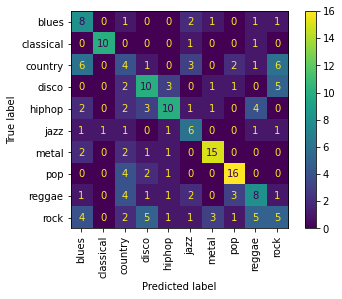

In [ ]:


# Fit du  Training set
classifier = svm.SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#Prediction sur le Test set
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical')


La précision du modèle est déjà meilleure. Notons néanmoins que la compilation est beaucoup lente que pour le KNN (de l'ordre de 15 minutes).

# **Modèle Random Forest**

Le modèle Random Forest consiste à diviser les données en plusieurs arbres décisionnels. Un modèle d'entraînement est appliqué à chacun de ces arbres.
Puis, on regarde la classification la plus fréquemment proposée par les arbres pour décider de la catégorisation.

              precision    recall  f1-score   support

       blues       0.60      0.86      0.71        14
   classical       0.85      0.92      0.88        12
     country       0.45      0.39      0.42        23
       disco       0.38      0.45      0.42        22
      hiphop       0.52      0.48      0.50        23
        jazz       0.45      0.75      0.56        12
       metal       0.65      0.62      0.63        21
         pop       0.64      0.61      0.62        23
      reggae       0.57      0.62      0.59        21
        rock       0.46      0.22      0.30        27

    accuracy                           0.55       198
   macro avg       0.56      0.59      0.56       198
weighted avg       0.54      0.55      0.53       198



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


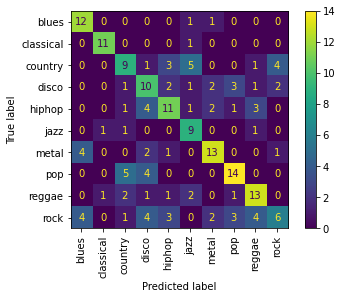

In [ ]:

#Fit du training set
rf = RandomForestClassifier(n_estimators=2000,max_depth=20, random_state=0)
rf.fit(X_train, y_train)

# Prediction sur le Test set
y_pred = rf.predict(X_test)

#Vérification de la qualité du modèle
print(classification_report(y_test, y_pred))

sklearn.metrics.plot_confusion_matrix(rf, X_test, y_test, xticks_rotation='vertical') # Matrice de confusion

La précision a encore augmenté, et ce avec un temps de compilation très court. C'est jusqu'ici le meilleur modèle.

Le modèle Random Forest permet de plus de mesurer l'importance des features. C'est l'objet du code ci-dessous.

Text(0.5, 1.0, 'Importance des caractéristiques')

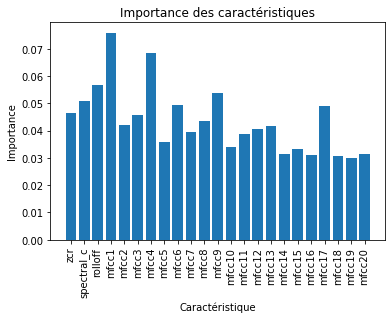

In [ ]:
importances = list(rf.feature_importances_)
plt.bar(column_names[1:], importances, orientation = 'vertical')
plt.xticks(column_names[1:], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Caractéristique'); plt.title('Importance des caractéristiques')

Les features ont presque toutes la même importance donc il n'était pas aberrant de garder toutes les variables.

# **Normalisation des données**

Jusqu'ici, nous avons utilisé les données brutes non normalisées. Or, les modèles KNN et SVM fonctionnent généralement mieux avec des données normalisées.
Commençons donc par normaliser les données.

In [ ]:
d=normalize(df.loc[:,df.columns != 'genre'])
dfn=pd.DataFrame(d,columns=column_names[1:])
dfn['genre']=df['genre']

X_train, X_test, y_train, y_test = train_test_split(dfn[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                                                       'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                                                        'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 
                                                        'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']],dfn['genre'],test_size=0.2)

# **KNN Normalisé**

              precision    recall  f1-score   support

       blues       0.20      0.24      0.22        21
   classical       0.87      0.72      0.79        18
     country       0.13      0.08      0.10        26
       disco       0.29      0.42      0.34        19
      hiphop       0.21      0.22      0.22        18
        jazz       0.21      0.23      0.22        13
       metal       0.41      0.55      0.47        20
         pop       0.45      0.39      0.42        23
      reggae       0.33      0.24      0.28        21
        rock       0.05      0.05      0.05        19

    accuracy                           0.31       198
   macro avg       0.32      0.31      0.31       198
weighted avg       0.31      0.31      0.30       198



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


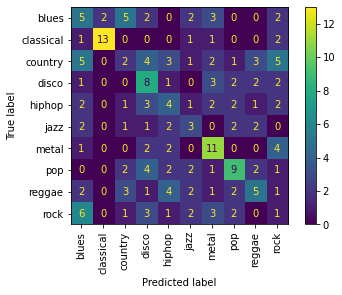

In [ ]:
#Fit du training set
knn = KNeighborsClassifier(n_neighbors=5) # 5 "points" les plus proches 
knn.fit(X_train, y_train)

# Prediction sur le Test set
y_pred = knn.predict(X_test)

#Vérification de la qualité du modèle
print(classification_report(y_test, y_pred))

sklearn.metrics.plot_confusion_matrix(knn, X_test, y_test, xticks_rotation='vertical') # Matrice de confusion

La normalisation a porté ses fruits ! Nous sommes passés d'un f1-score de 0.25 à 0.30.

# **SVM Normalisé**

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        21
   classical       0.00      0.00      0.00        18
     country       0.00      0.00      0.00        26
       disco       0.00      0.00      0.00        19
      hiphop       0.00      0.00      0.00        18
        jazz       0.07      1.00      0.12        13
       metal       0.00      0.00      0.00        20
         pop       0.00      0.00      0.00        23
      reggae       0.00      0.00      0.00        21
        rock       0.00      0.00      0.00        19

    accuracy                           0.07       198
   macro avg       0.01      0.10      0.01       198
weighted avg       0.00      0.07      0.01       198



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

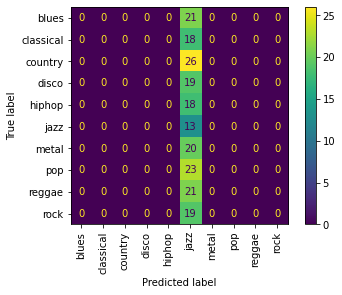

In [ ]:
# Fit du  Training set
classifier = svm.SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#Prediction sur le Test set
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical')

Le modèle donne de très mauvais résultats de manière inexpliquée. Tous les morceaux sont classifiés dans un seul genre.

# **Mise en application du meilleur modèle**

In [ ]:
#Fonction qui permet à l'utilisateur de renseigner le path d'un audio pour en prédire le genre grâce au modèle Random Forest

def classificateur (audio_path) :

  audio = librosa.load(f'{audio_path}')[0]
  colonnes_prédit = column_names[1:]
  dfprédit = pd.DataFrame(columns = colonnes_prédit)
  dfprédit.loc[0]=signal_analysis(audio)
  genre_prédit = rf.predict(dfprédit)
  
  return genre_prédit

audio_path = input('Entrez le path de votre audio : ')
print("Le genre de votre morceau est:",classificateur(audio_path))

#path example : /content/drive/My Drive/data_python/genres_original/classical/classical.00000.wav

Entrez le path de votre audio : /content/drive/My Drive/data_python/genres_original/classical/classical.00006.wav
Le genre de votre morceau est: ['classical']


# **Limites et pistes d'amélioration**

- Nous pourrions améliorer la précision des modèles en disposant d'une base de données initiale plus importante (plus de fichiers audio par style ou des extraits plus longs).
- Certains styles sont difficiles à distinguer, pour la machine mais également pour l'humain. Par exemple, le rock est un genre adjacent à d'autres styles comme le blues, le metal ou la pop. Les styles facilement identifiables obtiennent naturellement de meilleurs résultats.
- Les features choisies ne sont pas exclusives à l'analyse musicale. En effet, elles servent également à la classification audio au sens large. Par ailleurs, les variables mériteraient une étude plus approfondie.
- Les modèles utilisés ont simplement été importés. Dans l'idéal, il faudrait construire un modèle sur-mesure pour cette classification. Par ailleurs, nous avons optimisé les hyperparamètres "à la main". Il conviendrait de le faire grâce à du code.





# **Sources**

Julien PINQUIER. *Indexation sonore : recherche de composantes primaires pour une structuration audiovisuelle*. Human-Computer Interaction. Université Paul Sabatier - Toulouse III,
2004

https://fr.wikipedia.org/wiki/Zero_Crossing_Rate

https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn 